# Flow of the file: 
-- Scrape data from website
-- Read the dictionary to the CSV file
-- Read data from csv file using Pandas library 
-- Exploratory analysis: metadata and detecting anomalies ( too many empty variables, duplicates, ...)
-- Transform and clean data 
-- Visualize data

In [1]:
from bs4 import BeautifulSoup
import requests
import csv
import json

## Scraping data from website

In [2]:
#set the url and retrieve the content 
url_1 = 'https://www.newegg.com/GPUs-Video-Graphics-Cards/SubCategory/ID-48'

#set up the list of the url to read till page 100
url_list = []
for i in range(2,101):
    url = url_1 +'/Page-'+ str(i)
    url_list.append(url)


In [7]:
#this function create the data holder for content from web
# -- read data from url
# -- create the data dictionary with the key
# -- crawl neccessary data from the webpage and add value to the data dictionary corresponding to each key
# -- if empty data, fill as empty string

def read_data(url):
    data = {}
    keys = ['ID','Name','Brand','Rating','Number of rating', 'Price', 'Shiping','Image','Product Information']
    for key in keys:
        data[key] = []
    
    response = requests.get(url)
    
    #check status code of the response
    if response.status_code == 200:
        
        #create a beaufiulsoup object to parse HTML content 
        soup = BeautifulSoup(response.content,'html.parser')
        product_list = soup.find_all('div', class_= 'item-cell')

        for product in product_list: 

            #iterate over each product and find class 'item-container'
            item_container = product.find(class_='item-container')
            #get the id of the item_container
            item_id = item_container.get('id')
            #check if dictionary already have value, then append new value. If the dictionary doesn't have value yet, start the new value
            if data['ID'] is not None:
                data['ID'].append(item_id)
            else:
                data['ID'] = [item_id]

            #get name
            name_class = product.find('a',class_='item-title')
            name = name_class.text

            if data['Name'] is not None:
                data['Name'].append(name)
            else:
                data['Name'] = [name]

            #get brand
            brand_class = product.find('a', class_='item-brand')
            #some products doesn't have brand container so check if the brand containder exist or not
            if brand_class is None:
                 #check if dictionary already have value, then append new value. If the dictionary doesn't have value yet, start the new value
                if data['Brand'] is not None:
                    data['Brand'].append('')
                else:
                    data['Brand'] =  ['']
            else:
                brand = brand_class.find('img').get('title')
                if data['Brand'] is not None:
                    data['Brand'].append(brand)
                else:
                    data['Brand'] =  [brand]

            #get rating
            rating_class = product.find('a', class_='item-rating')
            #some products doesn't have RATING so check if the brand containder exist or not
            if rating_class is not None:
                rating = rating_class.get('title')
                #check if dictionary already have value, then append new value. If the dictionary doesn't have value yet, start the new value
                if data['Rating'] is not None:
                    data['Rating'].append(rating)
                else:
                    data['Rating'] = [rating]

            else:
                if data['Rating'] is not None:
                    data['Rating'].append('')
                else:
                    data['Rating'] = ['']


            #get number of rating
            number_rating = product.find('a', class_='item-rating')
            #some products doesn't have number_rating so check if the brand container exist or not
            if number_rating is not None: 
                item_rating = number_rating.text[1:-1]
                #check if dictionary already have value, then append new value. If the dictionary doesn't have value yet, start the new value
                if data['Number of rating'] is not None:
                    data['Number of rating'].append(item_rating)
                else:
                    data['Number of rating'] = ['']
            else:
                if data['Number of rating'] is not None:
                    data['Number of rating'].append('')
                else:
                    data['Number of rating'] = ['']

            #find price 
                #read the integer part
            if product.select_one('.price-current strong') is not None:
                current_price_rating = product.select_one('.price-current strong').text.replace(',','')
            else:
                current_price_rating = ''
                #read the decimal
            if product.select_one('.price-current sup') is not None:
                current_price_decimal_rating = product.select_one('.price-current sup').text.replace('.','')
            else:
                current_price_decimal_rating = ''
            
                #combine the integer and decimal 
            if current_price_rating != '':
                price = int(current_price_decimal_rating)/100+ int(current_price_rating)
            else: 
                price = ''
                #append the price
            if data['Price'] is not None:
                data['Price'].append(price)
            else:
                data['Price'] = [''] 

            #find shipping
            shipping = product.find(class_='price-ship')
            shipping_type = shipping.text
            #check if dictionary already have value, then append new value. If the dictionary doesn't have value yet, start the new value
            if data['Shiping'] is not None:
                data['Shiping'].append(shipping_type)
            else:
                data['Shiping'] = [''] 

            #find image url 
            image_url = product.find(class_='item-img')
            image = image_url.get('href')
            #check if dictionary already have value, then append new value. If the dictionary doesn't have value yet, start the new value
            if data['Image'] is not None:
                data['Image'].append(image)
            else:
                data['Image'] = ['']

            #product information
            product_infor = product.find(class_='item-features')
            product_dict = []
            for feature in product_infor.find_all('li'):
                feature = feature.get_text(strip=True).split(":")
                feature_name = feature[0]
                feature_value=feature[1]
                feature_dict = {feature_name:feature_value}
                product_dict.append(feature_dict)
            #check if dictionary already have value, then append new value. If the dictionary doesn't have value yet, start the new value
            if data['Product Information'] is not None: 
                data['Product Information'].append(product_dict)
            else:
                data['Product Information'] = [product_dict]

        return data
    
    else:
        print('Fail to retrieve the webpage: ', response.status_code)

In [8]:
#READ THE DATA into the combined_data
table = []

#read each link into a dictionary, append dictionary to the table list
#table = [{data1 from url1}, {data2 from url2},...]

for link in url_list:
    #read_data() return a dictionary with the format {'name of coumn': [val1, val2, ...]}
    data = read_data(link)
    table.append(data)

print(len(table))

combined_data = {}

for dictionary in table:
    for key, value in dictionary.items():
        #if the key is not found yet in the combined_data, it will take the first value 
        #if they key already exists, it will add into the value
        if key in combined_data:
            combined_data[key].extend(value)
        else:
            combined_data[key] = value

99


In [10]:
print(combined_data['Product Information'][0])

[{'Core Clock': '1855 MHz'}, {'Max Resolution': '7680 x 4320'}, {'DisplayPort': '2 x DisplayPort 2.1'}, {'HDMI': '2 x HDMI 2.1'}, {'Model #': '11322-02-20G'}, {'Item #': 'N82E16814202429'}, {'Return Policy': 'Standard Return Policy'}]


In [11]:
for key, value in combined_data.items():
    value_type = type(value).__name__
    print(f"Key: {key}, Value Type: {value_type} has {len(value)} values")
print('length of the dictionary is: ', len(combined_data))

Key: ID, Value Type: list has 3563 values
Key: Name, Value Type: list has 3563 values
Key: Brand, Value Type: list has 3563 values
Key: Rating, Value Type: list has 3563 values
Key: Number of rating, Value Type: list has 3563 values
Key: Price, Value Type: list has 3563 values
Key: Shiping, Value Type: list has 3563 values
Key: Image, Value Type: list has 3563 values
Key: Product Information, Value Type: list has 3563 values
length of the dictionary is:  9


In [12]:
#checking data 
position = combined_data['ID'].index('9SIAZUEGA94185')
value_at_position_319=combined_data['ID'][319]
name_319 = combined_data['Name'][319]
rating_319 = combined_data['Rating'][319]
numberrating_319 = combined_data['Number of rating'][319]
print(value_at_position_319)
print(name_319)
print(rating_319)
print(numberrating_319)

9SIAYTVESH8534
GIGABYTE AORUS Radeon RX 6900 XT 16GB GDDR6 PCI Express 4.0 ATX Video Card GV-R69XTAORUS M-16GD
Rating + 4.8
4


## Read the dictionary to the CSV file

In [13]:
#open a csv in write mode and create a csv.writer ojbect
with open('newegg_products.csv', 'w',newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    
    #write the header row with the keys
    writer.writerow(combined_data.keys())
    
    #write the values row by row
    rows = zip(*combined_data.values())
    writer.writerows(rows)
           
    print("CSV file has been created")
    

CSV file has been created


## Read data from csv file using Pandas library 

In [24]:
import pandas as pd

In [25]:
file = 'newegg_products.csv'
data_df = pd.read_csv(file)

In [26]:
data_df.describe()

,Number of rating,Price
count,1873.000000,3551.000000
mean,46.343833,582.624652
std,77.679990,466.709190
min,1.000000,5.000000
25%,5.000000,271.620000
50%,19.000000,465.000000
75%,57.000000,745.000000
max,985.000000,5239.750000


## Exploratory analysis: metadata and detecting anomalies ( too many empty variables, duplicates, ...)

In [94]:
%run CommonFunction.ipynb

In [42]:
table_shape(data_df)

The table has 3563 rows
The table has 10 cols


In [44]:
#what are the names and types of each column
col(data_df)

Index(['ID', 'Name', 'Brand', 'Rating', 'Number of rating', 'Price', 'Shiping',
       'Image', 'Product Information', 'new_brand'],
      dtype='object')
ID                      object
Name                    object
Brand                   object
Rating                  object
Number of rating       float64
Price                  float64
Shiping                 object
Image                   object
Product Information     object
new_brand               object
dtype: object


In [57]:
cols = data_df.columns
for col in cols: 
    check_empty(data_df,col)

There is no empty cell in  ID column
There is no empty cell in  Name column
There are 97 empty cells in the Brand column
There are 97 empty cells in the Brand column
There are 1690 empty cells in the Rating column
There are 1690 empty cells in the Rating column
There are 1690 empty cells in the Number of rating column
There are 1690 empty cells in the Number of rating column
There are 12 empty cells in the Price column
There are 12 empty cells in the Price column
There is no empty cell in  Shiping column
There is no empty cell in  Image column
There is no empty cell in  Product Information column
There is no empty cell in  new_brand column


In [22]:
#check empty rows in brand
empty_rows = data_df[data_df['Brand'].isnull()]
print(empty_rows)

                  ID                                               Name Brand  \
98        14-993-001  SPARKLE Intel Arc A750 TITAN OC Edition, 8GB G...   NaN   
116       14-993-002  SPARKLE Intel Arc A750 ORC OC Edition, 8GB GDD...   NaN   
121       14-993-003  SPARKLE Intel Arc A380 ELF, 6GB GDDR6, Single ...   NaN   
357   9SIB1PGJNB4195  EVGA GeForce RTX 3090 FTW3 ULTRA GAMING Video ...   NaN   
385   9SIB1PGG1Y2678  EVGA GeForce RTX 3090 XC3 ULTRA GAMING Video C...   NaN   
...              ...                                                ...   ...   
3483  9SIAT8UEUY8884  ONDA R5 220 Model 2GD3 AMD 550Mhz 80 SDDR3 2GB...   NaN   
3499  9SIB1PGFBX4913  ATI 100-437105 Radeon 9550 256MB 128-bit DDR A...   NaN   
3500  9SIAJZYB8H5843  ATI 100-505175 FireMV 2250 256Mb GDDR2 2048x15...   NaN   
3512  9SIB1PGFBW6693    ATI FirePro V7800 2GB 256-bit GDDR5 PCI Express   NaN   
3514  9SIAJZYB0V9851  ATI Technologies 100-505084 FireGL V3200 128Mb...   NaN   

     Rating  Number of rati

In [39]:
#check empty rows in Rating and Number of Rating
empty_rows = data_df[data_df['Rating'].isnull()]
print(empty_rows)

#CHECK THE EMPTY ROWS IN RATING AND NUMBER OF RATING, there are actually there is no information

                  ID                                               Name  \
2         14-500-559  ZOTAC GAMING GeForce RTX 4060 8GB OC Spider-Ma...   
4         14-932-630  GIGABYTE GeForce RTX 4060 WINDFORCE OC 8G Grap...   
17        14-500-558  ZOTAC GAMING GeForce RTX 4060 8GB Solo DLSS 3 ...   
27        14-930-093  ASRock Challenger Radeon RX 7600 8GB GDDR6 PCI...   
33        14-932-627  GIGABYTE GeForce RTX 4060 AERO OC 8G Graphics ...   
...              ...                                                ...   
3557  9SIB1PGJ846814  PNY Tesla M10 32 GB GDDR5 Graphics Card (TCSM1...   
3559  9SIB1PGFBW0408  HPE NVIDIA Tesla M10 Graphic Card 32 GB GDDR5 ...   
3560  9SIBBB1HSM4109  GIGABYTE GeForce RTX 3050 EAGLE OC 8G GDDR6 17...   
3561  9SIAPNMEUH5062  GIGABYTE GeForce GT 1030 Low Profile 2GB, GV-N...   
3562  9SIAPMXH4A5461  NVIDIA Tesla P40 24GB GDDR5 WORKSTATION Graphi...   

                       Brand Rating  Number of rating    Price  \
2                      ZOTAC    N

In [99]:
#write a function to check if column has duplicate value 
multi_duplicate(data_df,'ID','Name','Price','Shiping','Rating','Number of rating','Product Information')

The table has 654 duplicates based on cols:  ID Name Price Shiping Rating Number of rating Product Information


,ID,Name,Brand,Rating,Number of rating,Price,Shiping,Image,Product Information,new_brand
213,9SIB1PGFBX8058,NVIDIA Official GeForce RTX 2080 Founders Edit...,NVIDIA,Rating + 3,1.0,849.00,Free Shipping,https://www.newegg.com/p/1FT-0004-002R2,"[{'Core Clock': '1515 MHz'}, {'Max Resolution'...",NVIDIA
219,9SIAYTVEWM9503,GIGABYTE AORUS Radeon RX 6900 XT 16GB GDDR6 PC...,GIGABYTE,Rating + 4.8,16.0,899.75,$49.99 Shipping,https://www.newegg.com/gigabyte-radeon-rx-6900...,"[{'Max Resolution': '7680 x 4320'}, {'DisplayP...",GIGABYTE
237,9SIB1PGFBZ4965,MSI Radeon R9 390 8GB GDDR5 PCI Express 3.0 Cr...,MSI,Rating + 4,313.0,399.00,Free Shipping,https://www.newegg.com/msi-radeon-r9-390-r9-39...,[{'Core Clock': '1060 MHz (OC Mode)\n1040 MHz ...,MSI
245,9SIA4YUGX38250,Palit GameRock NVIDIA GeForce RTX 3090 24GB GD...,PALIT,NaN,NaN,3278.51,Free Shipping,https://www.newegg.com/p/1FT-0099-00066,"[{'Model #': 'NED3090T19SB-1021G'}, {'Return P...",PALIT
246,9SIARPHJJS3837,GIGABYTE GeForce GTX 1050 Ti OC Low Profile 4G...,GIGABYTE,Rating + 3.9,126.0,188.23,$49.99 Shipping,https://www.newegg.com/gigabyte-geforce-gtx-10...,[{'Core Clock': '1328 MHz in OC Mode\n1303 MHz...,GIGABYTE
...,...,...,...,...,...,...,...,...,...,...
3550,9SIAPNMEUH5051,"GIGABYTE GeForce GT 1030 Low Profile 2GB, GV-N...",GIGABYTE,NaN,NaN,114.79,$49.99 Shipping,https://www.newegg.com/p/1FT-00DS-00013,"[{'Model #': 'GV-N1030D5-2GL-003'}, {'Return P...",GIGABYTE
3551,9SIAPNMEUH5052,"GIGABYTE GeForce GT 1030 Low Profile 2GB, GV-N...",GIGABYTE,NaN,NaN,112.00,$49.99 Shipping,https://www.newegg.com/p/1FT-00DS-00015,"[{'Model #': 'GV-N1030D5-2GL-002'}, {'Return P...",GIGABYTE
3552,9SIBBB1HE75771,GDDR6 Gigabyte GeForce RTX 3060 VISION OC 12G ...,GIGABYTE,NaN,NaN,549.99,$49.99 Shipping,https://www.newegg.com/p/1FT-000A-003W4,"[{'Cooler': 'Air Cooler'}, {'Model #': 'c5bxu4...",GIGABYTE
3556,9SIAXZZJ8G4959,MAXSUN AMD Radeon RX 550 4GB Video Graphics Ca...,MAXSUN,NaN,NaN,115.99,Free Shipping,https://www.newegg.com/maxsun-rx-550/p/27N-005...,"[{'Core Clock': '1100 MHz'}, {'Max Resolution'...",MAXSUN


#### Metadata information: 

The new_egg product csv file store the scraped data SKUs of video graphic card from the website https://www.newegg.com/GPUs-Video-Graphics-Cards/SubCategory/ID-48, run through 100 pages and get 3500+ products information

The product information includes data of ID, Name, Brand, Rating and Number of people who rate, Price, Shipping price, the image, and detailed product information.

However, here are many empty rows in Brand, Number of rating and Rating
-- For emtpy row in Brand, can replace by the first letter from Name
-- For emtpry rows in Number of rating and rating, there are acutally no information
The shipping type is under the text, can transform to number to know the exact price

For duplicates, already check that there are 654 cols which are duplicated, need to check if we can drop half of them out 

## Transform and clean data 

#### Transform shipping from text to number
Adding the new column as Total_Price

In [100]:
shipping_unique_values = data_df['Shiping'].unique()
print(shipping_unique_values)

['Free Shipping' '$49.99 Shipping' '$9.99 Shipping' '$19.99 Shipping'
 '$4.99 Shipping' '$5.99 Shipping' '$8.60 Shipping' '$6.99 Shipping'
 '$21.00 Shipping' '$7.99 Shipping' '$40.00 Shipping' '$8.99 Shipping'
 '$46.00 Shipping' '$14.99 Shipping' '$20.00 Shipping' 'Special Shipping'
 '$16.99 Shipping' '$10.00 Shipping' '$30.00 Shipping' '$39.99 Shipping'
 '$46.78 Shipping' '$18.00 Shipping' '$9.00 Shipping' '$14.10 Shipping'
 '$53.00 Shipping' '$64.33 Shipping' '$8.68 Shipping' '$24.76 Shipping'
 '$58.00 Shipping' '$21.19 Shipping' '$19.00 Shipping' '$96.00 Shipping'
 '$15.00 Shipping']


In [101]:
#Thêm một cột total price dựa trên giá shipping 
def ship_price(ship_type):
    fee = 0
    ship_type = ship_type.split()[0]
    if ship_type in ('Free', 'Special'):
        fee = 0        
    else:
        fee = float(ship_type[1:])
    return fee

print(ship_price('Free shiping'))
print(ship_price('Special shiping'))
print(ship_price('$65.00 Shipping'))

0
0
65.0


In [102]:
#Thêm một cột total price dựa trên giá shipping 
data_df['Total_Price'] = data_df['Price'] + data_df['Shiping'].apply(ship_price)

#### Brand column, replace the empty with the brand from Name column

In [103]:
#create the new column as new_brand
#if brand name is empty in data_df , take it from the colum Title
data_df['new_brand'] = data_df['Brand'] 

#find the indices where brand is empty
# df['brand'].isnull() is to filter the dataframe df to select rows ( return the boolean mask)
empty_indices = data_df[data_df['Brand'].isnull()].index

#iterate over the empty indices and update the new_brand
for index in empty_indices:
    data_df.loc[index,'new_brand'] = data_df.loc[index,'Name'].split(' ')[0]

In [104]:
#check empty rows in brand
empty_rows = data_df[data_df['new_brand'].isnull()]
print(empty_rows)

Empty DataFrame
Columns: [ID, Name, Brand, Rating, Number of rating, Price, Shiping, Image, Product Information, new_brand, Total_Price]
Index: []


In [105]:
#check corresponding brand with newbrand to see if it replaced yet
empty_rows = data_df[data_df['Brand'].isnull()]
print(empty_rows)

                  ID                                               Name Brand  \
98        14-993-001  SPARKLE Intel Arc A750 TITAN OC Edition, 8GB G...   NaN   
116       14-993-002  SPARKLE Intel Arc A750 ORC OC Edition, 8GB GDD...   NaN   
121       14-993-003  SPARKLE Intel Arc A380 ELF, 6GB GDDR6, Single ...   NaN   
357   9SIB1PGJNB4195  EVGA GeForce RTX 3090 FTW3 ULTRA GAMING Video ...   NaN   
385   9SIB1PGG1Y2678  EVGA GeForce RTX 3090 XC3 ULTRA GAMING Video C...   NaN   
...              ...                                                ...   ...   
3483  9SIAT8UEUY8884  ONDA R5 220 Model 2GD3 AMD 550Mhz 80 SDDR3 2GB...   NaN   
3499  9SIB1PGFBX4913  ATI 100-437105 Radeon 9550 256MB 128-bit DDR A...   NaN   
3500  9SIAJZYB8H5843  ATI 100-505175 FireMV 2250 256Mb GDDR2 2048x15...   NaN   
3512  9SIB1PGFBW6693    ATI FirePro V7800 2GB 256-bit GDDR5 PCI Express   NaN   
3514  9SIAJZYB0V9851  ATI Technologies 100-505084 FireGL V3200 128Mb...   NaN   

     Rating  Number of rati

#### Transform Rating columns to a new column with only rating number

In [136]:
#Biểu diễn mối liên hệ giữa giá sản phẩm và rating của người dùng
#rating columns need to be transformed
data_df['new_rating'] = data_df['Rating'].str.split(' ').str[-1].astype(float)
print(data_df['new_rating'].head(10))
check_empty(data_df,'new_rating')

0    4.7
1    4.6
2    NaN
3    4.8
4    NaN
5    4.5
6    4.7
7    4.3
8    4.7
9    4.9
Name: new_rating, dtype: float64
There are 1690 empty cells in the new_rating column


,ID,Name,Brand,Rating,Number of rating,Price,Shiping,Image,Product Information,new_brand,Total_Price,new_rating
2,14-500-559,ZOTAC GAMING GeForce RTX 4060 8GB OC Spider-Ma...,ZOTAC,NaN,NaN,299.99,Free Shipping,https://www.newegg.com/asus-geforce-rtx-4060-d...,"[{'Max Resolution': '7680 x 4320'}, {'DisplayP...",ZOTAC,299.99,NaN
4,14-932-630,GIGABYTE GeForce RTX 4060 WINDFORCE OC 8G Grap...,GIGABYTE,NaN,NaN,299.99,Free Shipping,https://www.newegg.com/gigabyte-geforce-rtx-40...,"[{'Max Resolution': '7680 x 4320'}, {'DisplayP...",GIGABYTE,299.99,NaN
17,14-500-558,ZOTAC GAMING GeForce RTX 4060 8GB Solo DLSS 3 ...,ZOTAC,NaN,NaN,299.99,Free Shipping,https://www.newegg.com/zotac-geforce-rtx-4060-...,"[{'Max Resolution': '7680 x 4320'}, {'DisplayP...",ZOTAC,299.99,NaN
27,14-930-093,ASRock Challenger Radeon RX 7600 8GB GDDR6 PCI...,ASRock,NaN,NaN,269.99,Free Shipping,https://www.newegg.com/asrock-radeon-rx-7600-r...,"[{'Max Resolution': '7680 x 4320'}, {'DisplayP...",ASRock,269.99,NaN
33,14-932-627,GIGABYTE GeForce RTX 4060 AERO OC 8G Graphics ...,GIGABYTE,NaN,NaN,329.99,Free Shipping,https://www.newegg.com/gigabyte-geforce-rtx-40...,"[{'Max Resolution': '7680 x 4320'}, {'DisplayP...",GIGABYTE,329.99,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3557,9SIB1PGJ846814,PNY Tesla M10 32 GB GDDR5 Graphics Card (TCSM1...,"PNY Technologies, Inc.",NaN,NaN,1899.00,Free Shipping,https://www.newegg.com/p/1FT-000P-005H1,"[{'Model #': 'PNY206'}, {'Item #': '9SIB1PGJ84...","PNY Technologies, Inc.",1899.00,NaN
3559,9SIB1PGFBW0408,HPE NVIDIA Tesla M10 Graphic Card 32 GB GDDR5 ...,HPE,NaN,NaN,1899.00,Free Shipping,https://www.newegg.com/p/1FT-0068-00008,"[{'Max GPU Length': '267 mm'}, {'Model #': 'Q0...",HPE,1899.00,NaN
3560,9SIBBB1HSM4109,GIGABYTE GeForce RTX 3050 EAGLE OC 8G GDDR6 17...,GIGABYTE,NaN,NaN,415.99,$49.99 Shipping,https://www.newegg.com/gigabyte-geforce-rtx-30...,"[{'DirectX': '12 Ultimate'}, {'Chipset Manufac...",GIGABYTE,465.98,NaN
3561,9SIAPNMEUH5062,"GIGABYTE GeForce GT 1030 Low Profile 2GB, GV-N...",GIGABYTE,NaN,NaN,117.00,$49.99 Shipping,https://www.newegg.com/p/1FT-00DS-00020,"[{'Model #': 'GV-N1030D5-2GL-010'}, {'Item #':...",GIGABYTE,166.99,NaN


# Visualize data

- Yêu cầu thống kê (visualize dữ liệu nếu có thể):
    - Các hãng đang cung cấp Card đồ họa, số lượng sản phẩm của mỗi hãng.
    - Phân bố giá của các sản phẩm (Mức giá phổ biến là bao nhiêu)
    - Phân bố giá sản phẩm theo hãng
    - Biểu diễn mối liên hệ giữa giá sản phẩm và rating của người dùng

In [123]:
#Các hãng đang cung cấp Card đồ họa, số lượng sản phẩm của mỗi hãng
brand_group = data_df.groupby('Brand')['ID'].size().sort_values(ascending=False)
print(type(brand_group))

#convert brand_group from series to DF
brand_group_df = pd.DataFrame({'Brand':brand_group.index, 'Count':brand_group.values})

sum_row = pd.DataFrame(brand_group_df['Count'].sum() , columns = ['Count'], index = ['Total'])
sum_row['Brand'] =''
brand_group_df = pd.concat([brand_group_df, sum_row])

print(brand_group_df.head(5))

#Top 5 brands are MSI, GIGABYTE and ASUS, EVGA and PNY Technologies, Inc.

<class 'pandas.core.series.Series'>
                    Brand  Count
0                     MSI    716
1                GIGABYTE    568
2                    ASUS    566
3                    EVGA    363
4  PNY Technologies, Inc.    218


In [315]:
#phân bố giá của các sản phẩm (Mức giá phổ biến là bao nhiêu)
price_id_df = data_df[['ID','Name','Brand','Price']]

In [316]:
print(price_id_df.head())

           ID                                               Name  \
0  14-137-787  MSI Ventus GeForce RTX 4070 12GB GDDR6X PCI Ex...   
1  14-126-594  ASUS TUF Gaming GeForce RTX 4090 OC Edition Ga...   
2  14-930-070  ASRock Challenger D Radeon RX 6650 XT 8GB GDDR...   
3  14-930-083  ASRock Phantom Gaming Radeon RX 7900 XT 20GB G...   
4  14-202-394  Sapphire Pulse AMD RADEON RX 6800 GAMING GRAPH...   

           Brand    Price  
0            MSI   599.99  
1           ASUS  1799.99  
2         ASRock   249.99  
3         ASRock   799.99  
4  Sapphire Tech   499.99  


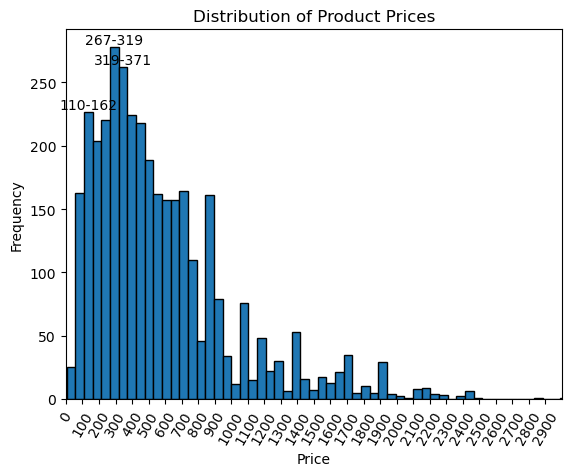

In [118]:
import matplotlib.pyplot as plt
import numpy as np

price_data = data_df['Price']

# Create histogram
n, bins, patches = plt.hist(price_data, bins=100, edgecolor='black')

# Set the x-axis limit
plt.xlim(0, 3000)

# Set the x-axis tick positions and labels
tick_positions = range(0, 3000, 100)
plt.xticks(tick_positions)
plt.xticks(rotation=60)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')

# Add range labels to top three bars
top_n = 3
top_indices = np.argsort(n)[-top_n:]  # Indices of top n bars
for i in top_indices:
    # Get the range of values for each bar
    range_label = f'{bins[i]:.0f}-{bins[i + 1]:.0f}'
    # Position the label above the bar
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), range_label,
             ha='center', va='bottom')

# Display the plot
plt.show()

#Top 3 price ranges are 267 - 319, 319 - 371 and 110-162 


0                Sapphire Tech
1                          MSI
2                        ZOTAC
3                Sapphire Tech
4                     GIGABYTE
                 ...          
3558                       MSI
3559                       HPE
3560                  GIGABYTE
3561                  GIGABYTE
3562    PNY Technologies, Inc.
Name: new_brand, Length: 3563, dtype: object
0        979.99
1        354.99
2        299.99
3        769.99
4        299.99
         ...   
3558     254.08
3559    1899.00
3560     415.99
3561     117.00
3562    1499.99
Name: Price, Length: 3563, dtype: float64


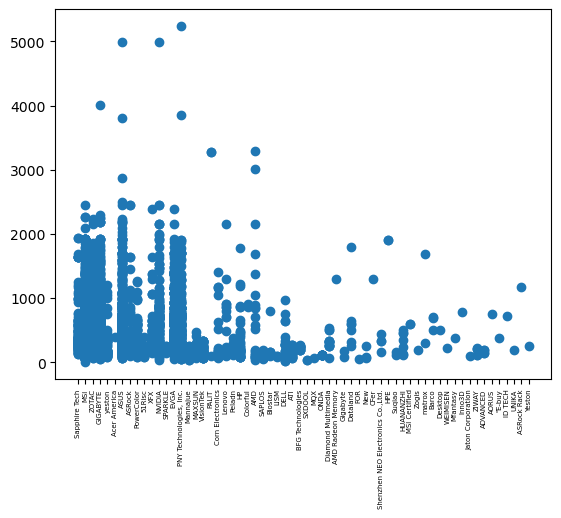

In [130]:
#draw the scatter plot Phân bố giá sản phẩm theo hãng
# Create scatter plot
x = data_df['new_brand']
y = data_df['Price']
plt.scatter(x, y)
plt.xticks(rotation=90,fontsize=5)

print(x)
print(y)

(0.0, 3000.0)

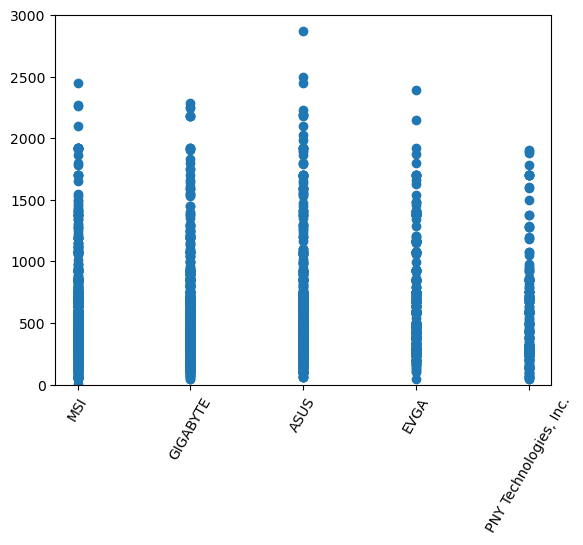

In [127]:
#draw the scatter plot Phân bố giá sản phẩm theo hãng
# Create scatter plot

#filter data fro selected_brand 
#Top 5 brands are MSI, GIGABYTE and ASUS, EVGA and PNY Technologies, Inc.
selected_brand = ['GIGABYTE','MSI','ASUS','EVGA','PNY Technologies, Inc.']
filtered_data = data_df[data_df['new_brand'].isin(selected_brand)]

#create x and y varaibles from filtered_data
x = filtered_data['new_brand']
y = filtered_data['Price']

# Create scatter plot
plt.scatter(x, y)
plt.xticks(rotation=60)

# Set the y-axis limit
plt.ylim(0, 3000)

#Phân bố giá sản phẩm theo top 5 brands: các hãng hàng đầu đều có range sản phẩm từ giá thấp đến giá cao

In [131]:
#Biểu diễn mối liên hệ giữa giá sản phẩm và rating của người dùng
#rating columns need to be transformed
rating = data_df['Rating']
print(rating.head(30))

0     Rating + 4.7
1     Rating + 4.6
2              NaN
3     Rating + 4.8
4              NaN
5     Rating + 4.5
6     Rating + 4.7
7     Rating + 4.3
8     Rating + 4.7
9     Rating + 4.9
10    Rating + 3.9
11    Rating + 4.7
12    Rating + 4.7
13      Rating + 5
14      Rating + 5
15    Rating + 4.8
16    Rating + 4.8
17             NaN
18    Rating + 4.5
19      Rating + 5
20    Rating + 4.8
21    Rating + 3.9
22      Rating + 5
23    Rating + 4.9
24    Rating + 4.3
25    Rating + 4.3
26    Rating + 4.3
27             NaN
28    Rating + 4.6
29      Rating + 5
Name: Rating, dtype: object


(0.0, 3000.0)

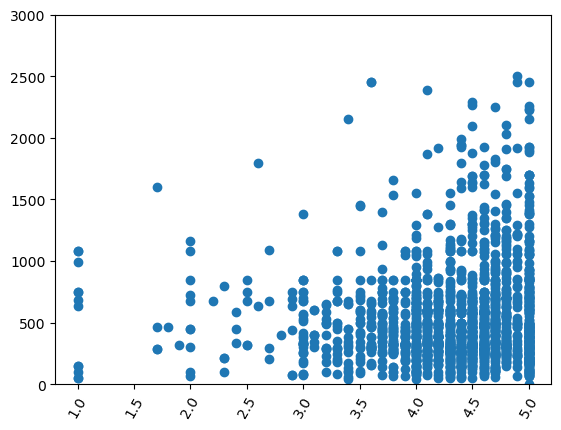

In [146]:
#scatter plot of price and new_rating, filtered all the NaNn number in column new_rating
#draw the scatter plot Phân bố giá sản phẩm theo hãng

# Create filtered dataframe, which filtered out the empty new_rating
rating_price_filtered_df = data_df[data_df['new_rating'].notna()][['Price','new_rating']]

#create scatter  plot
rating_price_filtered_df = rating_price_filtered_df.dropna(axis=1, how='all')

x = rating_price_filtered_df['new_rating']
y = rating_price_filtered_df['Price']
plt.scatter(x, y)
plt.xticks(rotation=60)

# Set the y-axis limit
plt.ylim(0, 3000)

In [160]:
data_df['new_rating'].min()
data_df['new_rating'].max()

5.0

In [181]:
# Define the rating categories
rating_categories = ['1-2', '2-3', '3-4', '4-5']

# Categorize the 'rating' column
data_df['rating_range'] = pd.cut(data_df['new_rating'], bins=[1, 2, 3, 4, 5], labels=rating_categories)

# Handle floating-point precision
data_df.loc[np.isclose(data_df['new_rating'], 1.0), 'rating_range'] = '1-2'

# Get unique rating categories and corresponding prices
rating_categories = rating_price_filtered_df['rating_range'].unique()
print(rating_categories)


['4-5', '3-4', '2-3', '1-2']
Categories (4, object): ['1-2' < '2-3' < '3-4' < '4-5']


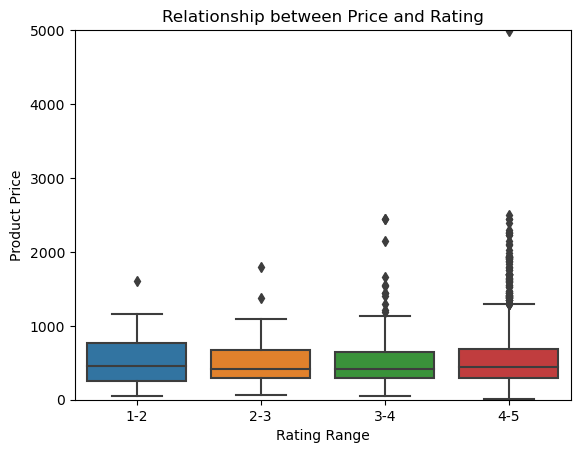

In [187]:
# Create filtered dataframe, which filtered out the empty new_rating
rating_price_filtered_df = data_df[data_df['new_rating'].notna()][['Price','rating_range']]

# Assuming you have a DataFrame called 'rating_price_filtered_df' with columns 'Price' and 'rating_range'
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'rating_price_filtered_df' with columns 'Price' and 'rating_range'

# Create box plot using Seaborn
sns.boxplot(x=rating_price_filtered_df['rating_range'], y=rating_price_filtered_df['Price'])

# Set labels and title
plt.xlabel('Rating Range')
plt.ylabel('Product Price')
plt.title('Relationship between Price and Rating')

#set the ylimit
plt.ylim(0,5000)

# Display the plot
plt.show()
